<a href="https://colab.research.google.com/github/iamttom/iamttom/blob/main/An%C3%A1lise_Explorat%C3%B3ria_de_Dados_Log%C3%ADsticos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Neste projeto, realizamos uma análise exploratória de dados (EDA) sobre uma base fictícia de entregas logísticas. O objetivo é entender padrões de entrega, atrasos, valores movimentados e distribuição geográfica dos pedidos.

A análise foca em perguntas como:

Quais cidades concentram o maior número de entregas?
Qual o tempo médio de entrega?
Qual a porcentagem de pedidos entregues com atraso?
Quais clientes ou regiões geram mais receita?
Essas informações são fundamentais para identificar gargalos logísticos e propor melhorias.

In [ ]:
# Pacotes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações de visualização
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [ ]:
# Criando um DataFrame de exemplo
dados = {
    'order_id': [1, 2, 3, 4, 5],
    'cliente': ['João', 'Maria', 'Pedro', 'Ana', 'Lucas'],
    'cidade': ['São Paulo', 'Salvador', 'Belo Horizonte', 'São Paulo', 'Salvador'],
    'data_pedido': pd.to_datetime(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04', '2023-01-05']),
    'data_entrega': pd.to_datetime(['2023-01-03', '2023-01-05', '2023-01-06', '2023-01-06', '2023-01-10']),
    'valor': [120.00, 85.50, 99.90, 75.00, 65.00],
    'status': ['Entregue', 'Atrasado', 'Entregue', 'Entregue', 'Atrasado']
}
df = pd.DataFrame(dados)
df.head()

,order_id,cliente,cidade,data_pedido,data_entrega,valor,status
0,1,João,São Paulo,2023-01-01,2023-01-03,120.0,Entregue
1,2,Maria,Salvador,2023-01-02,2023-01-05,85.5,Atrasado
2,3,Pedro,Belo Horizonte,2023-01-03,2023-01-06,99.9,Entregue
3,4,Ana,São Paulo,2023-01-04,2023-01-06,75.0,Entregue
4,5,Lucas,Salvador,2023-01-05,2023-01-10,65.0,Atrasado


In [ ]:
# Criando nova coluna com tempo de entrega
df['tempo_entrega'] = (df['data_entrega'] - df['data_pedido']).dt.days

# Agrupando por cidade
entregas_por_cidade = df['cidade'].value_counts()

# Verificando valores ausentes
df.isnull().sum()

,0
order_id,0
cliente,0
cidade,0
data_pedido,0
data_entrega,0
valor,0
status,0
tempo_entrega,0


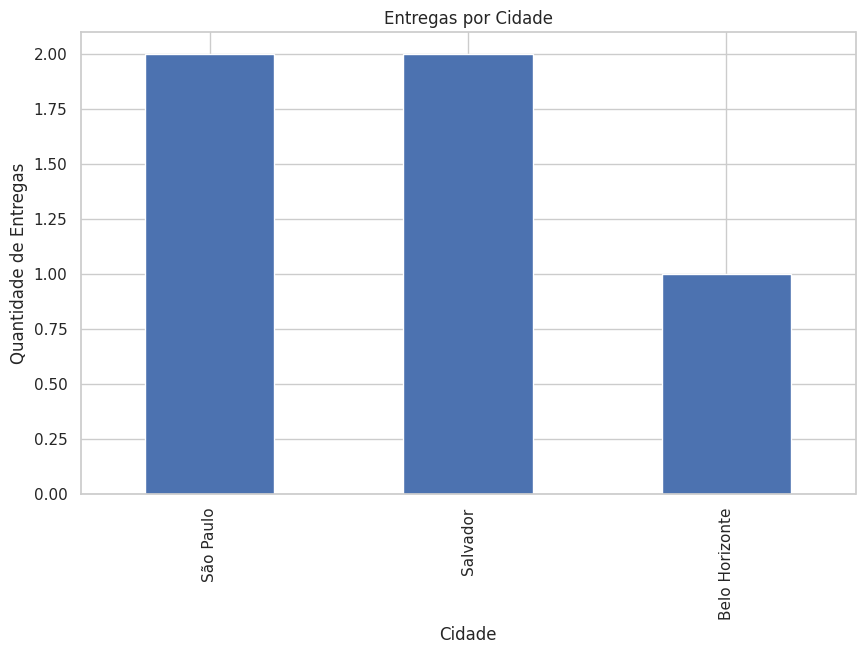

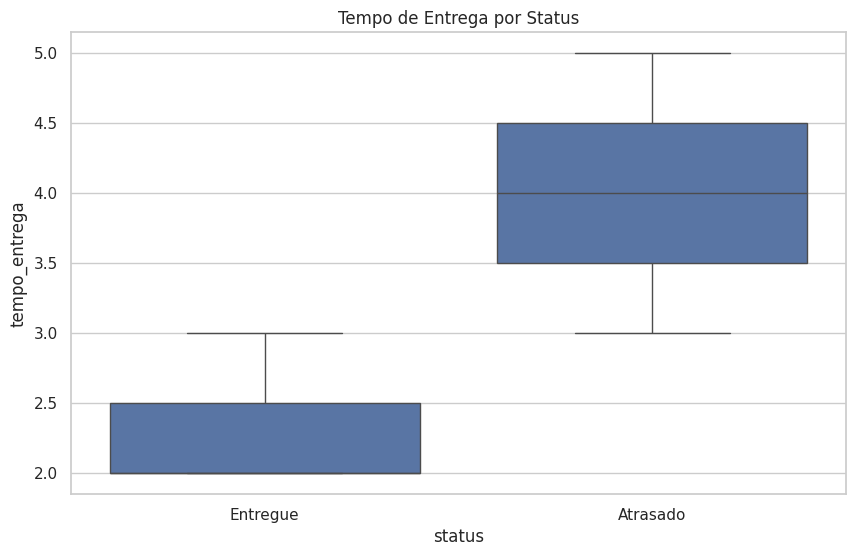

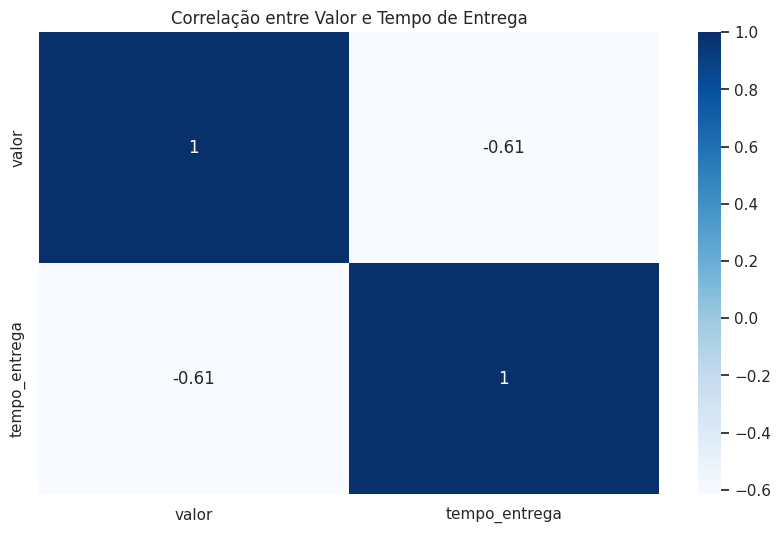

In [ ]:
# Gráfico de barras - Entregas por cidade
entregas_por_cidade.plot(kind='bar', title='Entregas por Cidade')
plt.xlabel('Cidade')
plt.ylabel('Quantidade de Entregas')
plt.show()

# Boxplot - Tempo de entrega por status
sns.boxplot(x='status', y='tempo_entrega', data=df)
plt.title('Tempo de Entrega por Status')
plt.show()

# Heatmap de correlação
sns.heatmap(df[['valor', 'tempo_entrega']].corr(), annot=True, cmap='Blues')
plt.title('Correlação entre Valor e Tempo de Entrega')
plt.show()